# Import some stuff

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from architecture.parameters.lstmParameters import LstmParameters
from architecture.simpleLSTMArchitecture import SimpleLSTMArchitecture
from system.lstmPreAndPostProcessor import LSTMPreAndPostProcessor
from system.lstmSystem import LSTMSystem

# Initialize the network

In [ ]:
sessionsName = "LSTM_test_3_"

params = LstmParameters(lstmSize=512, signalLength=5120, fftWindowLength=128, fftHopSize=32, countOfFrames=4)
batch_size = 1
aContextEncoderArchitecture = SimpleLSTMArchitecture(inputShape=(608, params.fftFreqBins()), lstmParams=params)
aPreProcessor = LSTMPreAndPostProcessor(params)
aContextEncoderSystem = LSTMSystem(aContextEncoderArchitecture, batch_size, aPreProcessor, params, sessionsName)

# Create some spectrogram

In [7]:
sampling_rate = 16000
window_size = 5120
time = np.arange(0, window_size / sampling_rate, 1 / sampling_rate, dtype=np.float32)

audio = np.sin(2 * np.pi * 240 * time) + np.sin(2 * np.pi * 2240 * time) + np.sin(2 * np.pi * 4480 * time) + np.sin(2 * np.pi * 7240 * time)

magSpectrogramOp  = tf.abs(tf.contrib.signal.stft(signals=audio, 
                                                  frame_length=params.fftWindowLength(), 
                                                  frame_step=params.fftHopSize()))
a=3                           
with tf.Session() as sess:
    magSpectrogram = sess.run(magSpectrogramOp)


(157, 65)


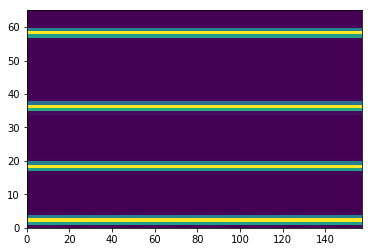

In [8]:
plt.pcolormesh(magSpectrogram.transpose())
print(magSpectrogram.shape)


In [9]:
generatedSpecs = aContextEncoderSystem.generate(magSpectrogram, length=30)

model_checkpoint_path: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_84036.ckpt"
all_model_checkpoint_paths: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_2167.ckpt"
all_model_checkpoint_paths: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_4167.ckpt"
all_model_checkpoint_paths: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_6167.ckpt"
all_model_checkpoint_paths: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_8167.ckpt"
all_model_checkpoint_paths: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_10167.ckpt"
all_model_checkpoint_paths: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_12167.ckpt"
all_model_checkpoint_paths: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_14167.ckpt"
all_model_checkpoint_paths: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_16167.ckpt"
all_model_checkpoint_paths: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_18167.ckpt"
all_model_checkpoint_paths: "utils/saved_models/LSTM_test_2_/model-LSTM_test_2_20167.ckpt"
all_mode

Text(0.5,1,'total')

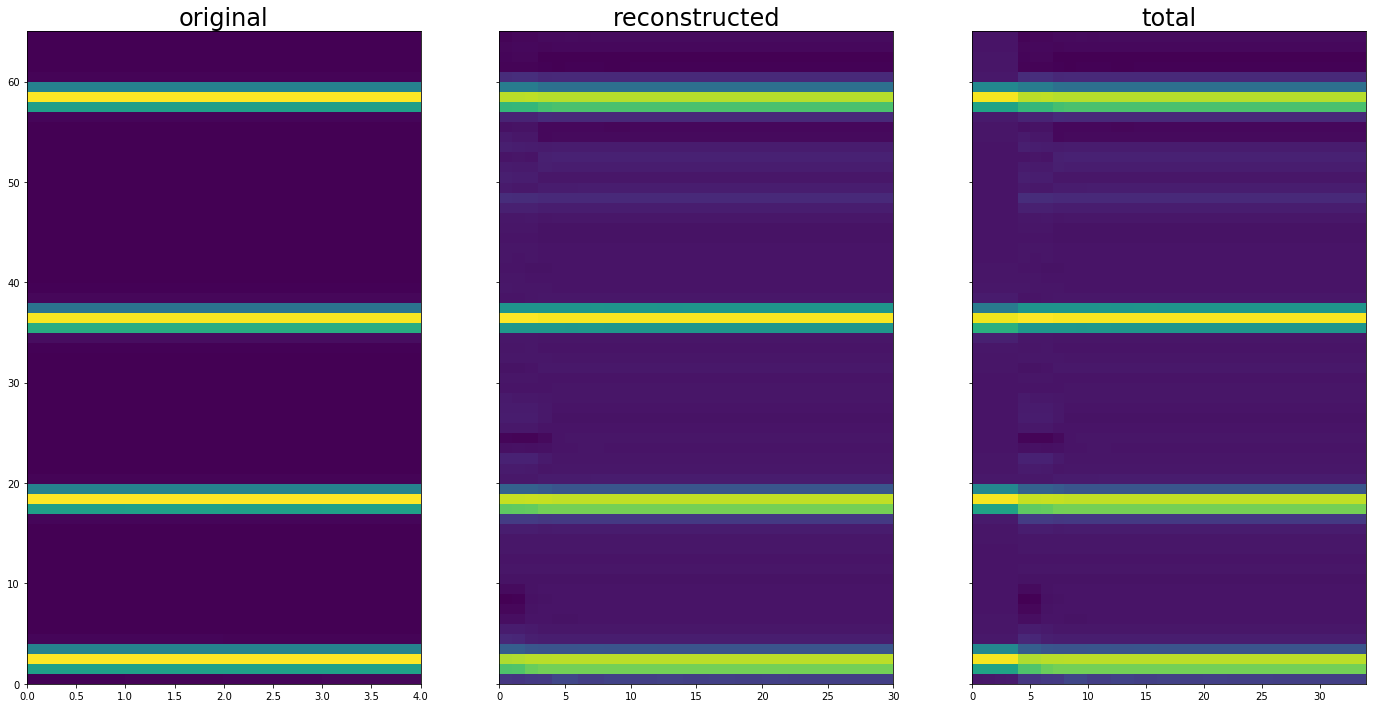

In [10]:
f, axarr = plt.subplots(1, 3, sharey='row', figsize=(24, 12))

axarr[0].pcolormesh(generatedSpecs[:4].transpose())
axarr[0].set_title('original', size=24)
axarr[1].pcolormesh(generatedSpecs[4:].transpose())
axarr[1].set_title('reconstructed', size=24)
axarr[2].pcolormesh(generatedSpecs.transpose())
axarr[2].set_title('total', size=24)